In [1]:
import pandas as pd

In [2]:
file_url ='insurance.csv'
data = pd.read_csv(file_url)      # 데이터셋 읽기

In [3]:
# 데이터 확인하기
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [4]:
data.head()   # 상위 5줄 출력

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [5]:
data.info()     # 컬럼 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [6]:
data.describe()  # 통계 정보 출력

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [7]:
# 소수점 2째자리까지만 표시해 통계 정보 출력하기
round(data.describe(), 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


### 사분위수 (Quantile)
  - 데이터를 오름차순으로 정렬했을 때
    25%, 50%, 75% 위치에서 확인한 값임
  - Q1, Q2, Q3 라고도 표현함  

### 데이터셋 나누기
- 독립변수 X
- 종속변수 y

In [8]:
X = data[['age', 'sex','bmi', 'children', 'smoker']]       # 독립변수
y = data['charges']     # 종속변수

### 데이터셋 분할
  - 학습셋과 시험셋
  - 사이킷런 관련 모듈(train_test_split)

In [9]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [10]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split       # 사이킷런 임포트

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [13]:
# 데이터 모델링
from sklearn.linear_model import LinearRegression

In [14]:
# 선형 회귀에 사용할 모델 생성
model = LinearRegression()

In [15]:
# 선형 회귀로 학습
# model.fit(독립변수, 종속변수)
model.fit(X_train, y_train)

LinearRegression()

### 모델을 활용해 예측하기
  - 오버피팅(overfitting) : 모델이 학습셋에 지나치게 잘 맞도록 학습되어서, 새로운 데이터에 대한 예측력이 떨어지는 현상을 의미함

In [16]:
pred = model.predict(X_test)

### 테이블로 평가하기
  - 예측한 값은 pred에, 각각 실제 정보는 y_test에 저장되어 있음

In [17]:
comparison = pd.DataFrame({'actual' : y_test, 'pred' : pred})

In [18]:
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


### 그래프로 평가하기



In [19]:
import matplotlib.pylab as plt
import seaborn as sns

<Axes: xlabel='actual', ylabel='pred'>

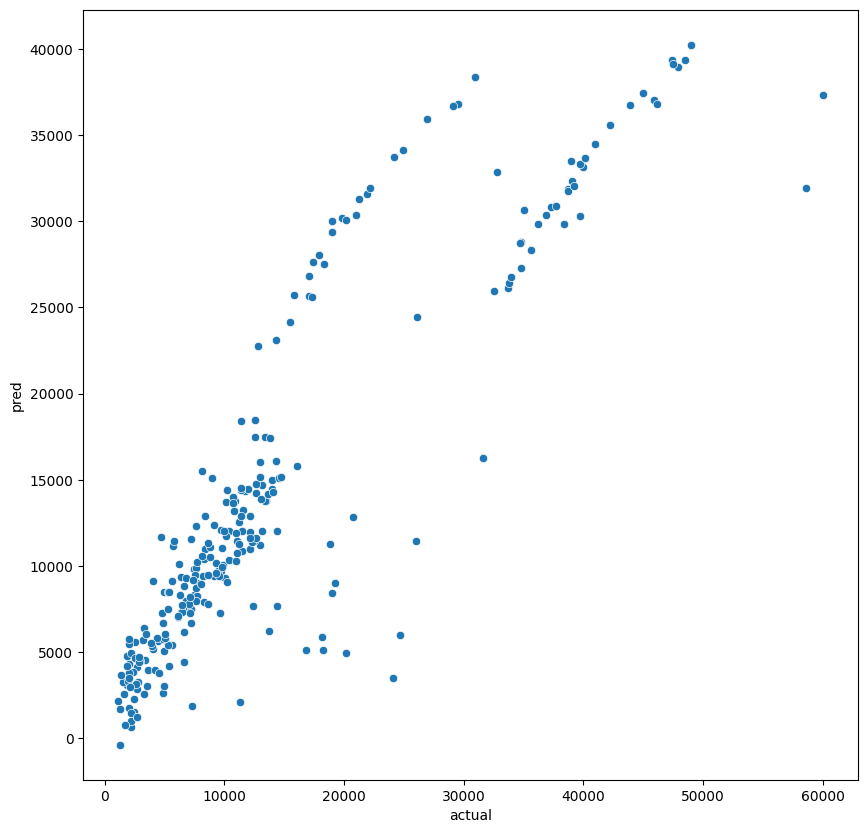

In [20]:
plt.figure(figsize=(10,10))   # 그래프 크기 정의
sns.scatterplot(x='actual', y= 'pred', data=comparison)   # 산점도 그래프 , x축에 실제값 actural, y축에 예측값 pred를 지정함

In [21]:
from sklearn.metrics import mean_squared_error      # MSE 라이브러리 임포트
mean_squared_error(y_test, pred) ** 0.5             # RMSE 계산 실행

5684.927776334485

In [22]:
mean_squared_error(y_test, pred, squared=False)

5684.927776334485

In [23]:
model.score(X_train, y_train)    # R^2 비율이 약 0.74가 나옴

0.7368220127747351

### 우리가 만들 모델은 0.74가 나왔으므로 괜찮은 수준임

In [24]:
# 독립변수 5개에 대한 계수 구하기
model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [25]:
pd.Series(model.coef_, index=X.columns)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [26]:
model.intercept_

-11576.999976112367